# **1. Construir un clasificador para el dataset MNIST que alcance más del 97% de accuracy en el test set.**

**Pista: El KNeighborsClassiffier trabaja bien para esta tarea.**

**K-Nearest Neighbors**
Algoritmo de aprendizaje supervisado simple y efectivo utilizado para clasificación (y regresión en su versión *K-Nearest Regressor*). Asigna la etiqueta de clase a una muestra basándose en las etiquetas de las "k" muestras más cercanas en el espacio de características.

* **k**. Número de vecinos cercanos a considerar. Un número muy bajo hace al modelo sensible al ruido (overfitting), de la misma forma para el underfitting.
* **wegiths**. Puede ser *uniform* (todos los vecinos tienen el mismo peso) o *distance* (los vecinos más cercanos tienen mayor peso). usar *distance* puede ser útil cuando algunos vecinos están significativamente más cerca que otros.
* **algorithm**. Determina el algoritmo de búsqueda utilizado para computar los vecinos más cercanos. Afecta la velocidad de cálculo sin cambiar el resultado.
* **leaf size**. Afecta la velocidad de construcción y consulta de los árboles construidos para la búsqueda de vecinos. Solo es relevante para *ball_tree* y *kd_tree* (que son algoritmos).
* **p**. Define la métrica de distancia a utilizar. Por defecto es 2, que corresponde a la distancia euclidiana. Si p=1, se usa la distancia manhattan.
* **metric**. Permite especificar la métrica de dsitancia directamente.

***algorihtm*, *leaf_size* y *p* afectan a la eficiencia computacional más que a la precisión del modelo.**

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


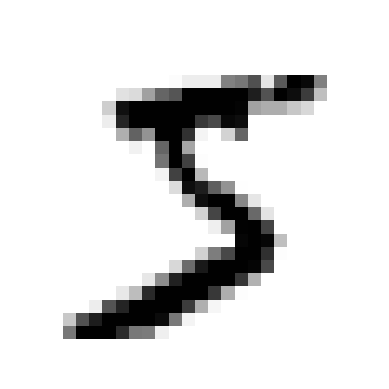

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0].to_numpy() # Es una Serie de Pandas que se necesita converto a Numpy
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [6]:
y_knn_pred = knn_clf.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

## **GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Diccionario de cambinación de parámetros a probar.
param_grid = [{"weights": ["uniform", "distance"], "n_neighbors": [3,4,5]}]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid, cv=5,
                           verbose=3)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  30.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  36.5s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  37.5s


In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

# **2. Escribir una función que pueda realizar un desplazamiento de un pixel a una imagen de MNIST en cualquier dirección (izq., der., arriba, abajo).**

**Luego, por cada imagen en el *training set*, crear cuatro copias desplazadas (una por dirección) y añadirlas al set de entrenamiento. FInalmente, entrenar al mejor modelo con este dataset extendido y medir su *accuracy* en el test set.**

In [ ]:
from scipy.ndimage.interpolation import shift

# iamgen a desplazar, desplazamiento en x y en y
def shift_image(image, dx, dy):
  image = image.reshape((28,28))  # Se reestructura a 28,28
  shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
  # cval define el valor constante para rellenar los pixel nuevos al desplazar la imagen
  return shifted_image.reshape([-1]) # Se reestructura a su formate de vector y se retorna

In [ ]:
image = X_train.iloc[1000].to_numpy()
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted_down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("shifted_left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")

In [ ]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
  for image, label in zip(X_train, y_train):
    X_train_augmented.append(shift_image(image, dx,dy))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [ ]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
knn_clf = KNeighborsClassifier(**grid_search.best_params)

In [ ]:
knn_clf.fit(X_train_augmented, y_train_augmented)

In [ ]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

# **3. Trabajar con el *Titanic* set**
**El objetivo es predecir si un pasajero sobrevivirá o no basado en sus atrebutos como la edad, sexo, tipo de pasajero, cuando embarcaron, etc.**

In [1]:
import os
import urllib.request

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()

In [2]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [3]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
train_data[train_data["Sex"]=="female"]["Age"].median()

27.0

Se cambiarán los valores nulos de la edad con su media. **Se podría realizar una manera más inteligente**, por ejemplo, **tratar de predecir la edad con los demás atributos**.

In [8]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## **Counstruir el pipeline de preprocesamiento**

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [15]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [16]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

Ahora se puede realizar un buen preprocesamiento que toma la data en crudo y retorna a la salida características numéricas con las cuales podemos alimentar a cualquier modelo de ML.

In [18]:
X_train = preprocess_pipeline.fit_transform(
    train_data[num_attribs + cat_attribs]
)
X_train

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [20]:
y_train = train_data["Survived"]

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
X_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])
y_pred = forest_clf.predict(X_test)

In [24]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8137578027465668

In [27]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8249313358302123

Se va a representar las 10 puntuaciones de cada mdoelo, junto con un diagrama de cajas que resalta los cuartiles inferio y superior, y "bigotes" que muestran la amplitud de las puntuaciones. Hay que tener en cuenta que la función *boxplot()* detecta los valores atípicos (llamados "volantes") y no los incluye en los bigotes.

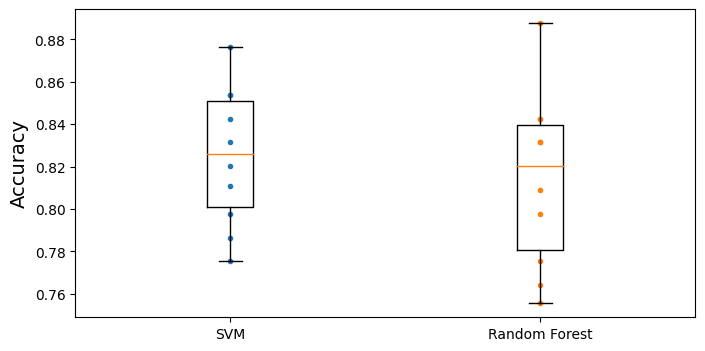

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM", "Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

The random forest classifier got a very high score on one of the 10 folds, but overall it had a lower mean score, as well as a bigger spread, so it looks like the SVM classifier is more likely to generalize well.

To improve this result further, you could:

* Compare many more models and tune hyperparameters using cross validation and grid search,
* Do more feature engineering, for example:
  * Try to convert numerical attributes to categorical attributes: for example, different age groups had very different survival rates (see below), so it may help to create an age bucket category and use it instead of the age. Similarly, it may be useful to have a special category for people traveling alone since only 30% of them survived (see below).
  * Replace SibSp and Parch with their sum.
  * Try to identify parts of names that correlate well with the Survived attribute.
  * Use the Cabin column, for example take its first letter and treat it as a categorical attribute.

In [30]:
train_data["AgeBucket"] = train_data["Age"]//15*15
train_data[["AgeBucket", "Survived"]].groupby(["AgeBucket"]).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [31]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


# **Construir un clasificador de Spam**
* Descargar ejemplos de epam de *Apache SpamAssassin's public datasets*
* Escribir un pipeline de preparación de datos para convertir cada email en un vector de características.
* Agregar hiperparamétros al pipeline de preparación para controlar si hay *headers*, convertir en *lowercase*, remover puntuación, reemplazar URLs, reemplazar todos los númerso con "NUMBER", o realizar *stemming*.
* Revisar varios clasificadores y ver si se puede construir un buen clasificador de spam, con un alto *recall* y *precision*.

In [1]:

import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(ham_url=HAM_URL, spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", ham_url), ("spam.tar.bz2", spam_url)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=spam_path)
        tar_bz2_file.close()

In [2]:
fetch_spam_data()

In [3]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [4]:
len(ham_filenames)

2500

In [5]:
len(spam_filenames)

500

Se puede utilizar el módulo `email` para parsear estos emails.

In [12]:
import email
import email.policy

def load_email(is_spam, filename, spam_path=SPAM_PATH):
  directory = "spam" if is_spam else "easy_ham"
  with open(os.path.join(spam_path, directory, filename), "rb") as f:
    return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [13]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

In [14]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [15]:
print(spam_emails[6].get_content().strip())

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.

This is an opportunity to make an excellent income.  No experience
is required.  We will train you.

So if you are looking to be employed from home with a career that has
vast opportunities, then go:

http://www.basetel.com/wealthnow

We are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.

To be removed from our link simple go to:

http://www.basetel.com/remove.html


4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


Algunos emails están aprtidor, con imágenes y attachments. Observemos varios tipos de estructura.

In [16]:
def get_email_structure(email):
  if isinstance(email, str):
    return email  # Se verifica si es un texto plano
  # Si no, se asume que es un objeto email más complejo (ejem. EmailMessage).
  # El payload es el contenido principal, que puede ser texto, HTML, como
  # compuesto (múltiples partes)
  payload = email.get_payload()
  if isinstance(payload, list):
    # Si es una lista, indica que es multipart.
    # La función se llama así misma recursivamente para obtener
    # cada una de las partes.
    return "multipar({})".format(", ".join([
        get_email_structure(sub_email)
        for sub_email in payload
        ]))
  # Si no es una lista, se asuem como correo electrónico de estructura simple
  # text/plain, text/html
  else:
    return email.get_content_type()

In [17]:
from collections import Counter

def structures_counter(emails):
  structures = Counter() # Cuenta las diferentes estructuras de correo electrónico encontradas
  for email in emails:
    structure = get_email_structure(email)
    structures[structure] += 1
  return structures

In [19]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipar(text/plain, application/pgp-signature)', 66),
 ('multipar(text/plain, text/html)', 8),
 ('multipar(text/plain, text/plain)', 4),
 ('multipar(text/plain)', 3),
 ('multipar(text/plain, application/octet-stream)', 2),
 ('multipar(text/plain, text/enriched)', 1),
 ('multipar(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipar(multipar(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipar(text/plain, video/mng)', 1),
 ('multipar(text/plain, multipar(text/plain))', 1),
 ('multipar(text/plain, application/x-pkcs7-signature)', 1),
 ('multipar(text/plain, multipar(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipar(text/plain, multipar(text/plain, text/plain), multipar(multipar(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipar(text/plain, application/x-java-applet)', 1)]

In [20]:
for header, value in spam_emails[0].items():
  print(header, ":", value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

In [21]:
spam_emails[0]["Subject"]

'Life Insurance - Why Pay More?'

**Separar datos**

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(ham_emails + spam_emails, dtype=object)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. Funció para convertir HTML a un texto plano. Se podría hacer BeautifulSoup, pero se hará de otra manera.

In [26]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

In [28]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email)=="text/html"]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [32]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

La siguinete función toma un email como entrada y retorna su contenido como texto plano, sea cual fuere el formato.

In [33]:
def email_to_text(email):
  html = None
  for part in email.walk():
    ctype = part.get_content_type()
    if not ctype in ("text/plain", "text/html"):
      continue
    try:
      content = part.get_content()
    except:
      content = str(part.get_payload())
    if ctype == "text/plain":
      return content
    else:
      html = content
  if html:
    return html_to_plain_text(html)

In [34]:
print(email_to_text(sample_html_spam)[:100], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Wat ...


Para lo siguiente se requiere instalar Natural Language Toolkit.

In [36]:
!pip3 install nltk

In [38]:
try:
  import nltk

  stemmer = nltk.PorterStemmer()
  for word in ("Computations", "Computation", "Computing", "Computed", "Compute", "Compu"):
    print(word, "=>", stemmer.stem(word))
except ImportError:
  print("Error: Se requiere el módulo NLTK para realizar stemming")





Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compu => compu


También se requiere reemplazar las URLs con la palabra URL.

In [39]:
!pip install urlextract

In [40]:
try:
    import urlextract # may require an Internet connection to download root domain names

    url_extractor = urlextract.URLExtract()
    print(url_extractor.find_urls("Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"))
except ImportError:
    print("Error: replacing URLs requires the urlextract module.")
    url_extractor = None

['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


Ahora se colocará todo esto en un transformer que se utilizará para convertir los emails en contadores de palabras. Tener en cuenta que separamos frases en palabras utilizado `split()`. Esto funciona para muchos lenguajes escritos, pero no para todos. El Chino y Japonés generalmente no utilizan los espacios en blanco para separar palabras.

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin
# Esta clase está diseñada para ser un componente en un pipeline de procesamiento de datos

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, strip_headers = True, lower_case=True, remove_punctuation=True,
               replace_urls=True, replace_numbers=True, stemming=True):
    self.strip_headers = strip_headers
    self.lower_case = lower_case
    self.remove_punctuation = remove_punctuation
    self.replace_urls = replace_urls
    self.replace_numbers = replace_numbers
    self.stemming = stemming
  # No necesita parender nada, así que retorna self.
  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    X_transformed = []
    for email in X: # Convierte a email
      text = email_to_text(email) or ""
      if self.lower_case:
        text = text.lower()
      if self.replace_urls and url_extractor is not None:
        urls = list(set(url_extractor.find_urls(text)))
        urls.sort(key=lambda url: len(url), reverse=True)
        for url in urls:
          text = text.replace(url, " URL ")
      if self.replace_numbers:
        text = re.sub(r"\d+(?:\.\d*)?(?:[eE][+-]?\d+)", "NUMBER", text)
      if self.remove_punctuation:
        text = re.sub(r"\W+", " ", text, flags=re.M)
      word_counts = Counter(text.split())
      if self.stemming and stemmer is not None:
        stemmed_word_counts = Counter()
        for word, count in word_counts.items():
          stemmed_word = stemmer.stem(word)
          stemmed_word_counts[stemmed_word] += count
        word_counts = stemmed_word_counts
      X_transformed.append(word_counts)
    return np.array(X_transformed)

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True,
                 replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

Transformaciones en un par de emails

In [52]:
X_few = X_train[:3]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

array([Counter({'chuck': 1, 'murcko': 1, 'wrote': 1, 'stuff': 1, 'yawn': 1, 'r': 1}),
       Counter({'the': 11, 'of': 9, 'and': 8, 'all': 3, 'christian': 3, 'to': 3, 'by': 3, 'jefferson': 2, 'i': 2, 'have': 2, 'superstit': 2, 'one': 2, 'on': 2, 'been': 2, 'ha': 2, 'half': 2, 'rogueri': 2, 'teach': 2, 'jesu': 2, 'some': 1, 'interest': 1, 'quot': 1, 'url': 1, 'thoma': 1, 'examin': 1, 'known': 1, 'word': 1, 'do': 1, 'not': 1, 'find': 1, 'in': 1, 'our': 1, 'particular': 1, 'redeem': 1, 'featur': 1, 'they': 1, 'are': 1, 'alik': 1, 'found': 1, 'fabl': 1, 'mytholog': 1, 'million': 1, 'innoc': 1, 'men': 1, 'women': 1, 'children': 1, 'sinc': 1, 'introduct': 1, 'burnt': 1, 'tortur': 1, 'fine': 1, 'imprison': 1, 'what': 1, 'effect': 1, 'thi': 1, 'coercion': 1, 'make': 1, 'world': 1, 'fool': 1, 'other': 1, 'hypocrit': 1, 'support': 1, 'error': 1, 'over': 1, 'earth': 1, 'six': 1, 'histor': 1, 'american': 1, 'john': 1, 'e': 1, 'remsburg': 1, 'letter': 1, 'william': 1, 'short': 1, 'again': 1, 'becom

# Ahora se requiere la cuenta de las palabras, y convertirlas a vectores.

In [53]:
from scipy.sparse import csr_matrix

# Convierte un conjunto de contadores de palabras en una matriz de vectores
# empleando bag-to-words con un tamaño de vocabulario limitado.
class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
  # Permite limitar la dimensión de los vectores de salida
  def __init__(self, vocabulary_size=1000):
    self.vocabulary_size = vocabulary_size
  # Construye el vocabulario a partir del conjunto de datos de entrenamiento "X"
  # que se espera que sea una colección de contadores de palabras
  def fit(self, X, y=None):
    total_count = Counter() # Acumula el conteo total de todas las palabras encontradas en 'X'
    for word_count in X:
      for word, count in word_count.items():
        total_count[word] += min(count, 10)
      most_common = total_count.most_common()[:self.vocabulary_size]
      # Se construye un diccionario que mapea cada palabra a un índice único,
      # comenzando en 1, ya que el índice 0 se reservará para palabras fuera del vocabulario
      self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(most_common)}
      return self

  # COnvierte cada contador de palabras en 'X' en un vector esparcido (sparse vector)
  # empleando el vocabualrio construido durante 'fit'
  def transform(self, X, y=None):
    rows = []
    cols = []
    data = []
    for row, word_count in enumerate(X):
      for word, count in word_count.items():
        rows.append(row)
        cols.append(self.vocabulary_.get(word,0))
        data.append(count)
    return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1))

El anterior tiene un error, así que se utiliza el de abajo, solo es de revisar algunas líneas.

In [65]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y=None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1))

In [66]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [67]:
X_few_vectors.toarray()

array([[ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [99, 11,  9,  8,  3,  1,  3,  1,  3,  2,  3],
       [67,  0,  1,  2,  3,  4,  1,  2,  0,  1,  0]])

 El 143 en la segunda fila indica que el segundo email continene 99 palabras que no son parte del vocabulario. El1 en la 3 fila, 4ta columna indica que 4 palabra está presenta solamente una vez.

In [68]:
vocab_transformer.vocabulary_

{'the': 1,
 'of': 2,
 'and': 3,
 'to': 4,
 'url': 5,
 'all': 6,
 'in': 7,
 'christian': 8,
 'on': 9,
 'by': 10}

Ahora ya se puede entrenar al primer clasificador de spam

In [69]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer())
])

x_train_transformed = preprocess_pipeline.fit_transform(X_train)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
score = cross_val_score(log_clf, x_train_transformed, y_train, cv=3, verbose=3)
score.mean()

[CV] END ................................ score: (test=0.981) total time=   1.8s
[CV] END ................................ score: (test=0.984) total time=   0.8s
[CV] END ................................ score: (test=0.990) total time=   0.6s


0.985

In [71]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
log_clf.fit(x_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100*precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100*recall_score(y_test, y_pred)))

Precision: 96.88%
Recall: 97.89%
